In [1]:
import pandas as pd
import numpy as np 
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import warnings
warnings.filterwarnings("ignore")

# Load the data

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# We want to predict the column survived for this testing data set.

In [6]:
# women who survived

womenGeneral = train.loc[train.Sex=='female']['Survived']
# sum the women who survived,
# sum all the  results possible, if not survived Survived = 0, so it does nt add anything to our sum, 
# we get the number off the survivals
rate_women = sum(womenGeneral)/len(womenGeneral)

print(" the rate of women who survived",rate_women)


 the rate of women who survived 0.7420382165605095


In [7]:
# men who survived

menGeneral = train.loc[train.Sex=='male']['Survived']

rate_men = sum(menGeneral)/len(menGeneral)

print(" the rate of men who survived",rate_men)


 the rate of men who survived 0.18890814558058924


# Decision Trees model 

In [8]:

# the target
y = train['Survived']

# Select the features
features = ['Pclass', 'Sex', 'SibSp','Parch']

X=pd.get_dummies(train[features])

X_test=pd.get_dummies(test[features])

# Replace NaN with zero and infinity with large finite numbers
X_test[:] = np.nan_to_num(X_test)



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train,Xtest, y_train,y_test = train_test_split(X,y, train_size = 0.8)


# Tuning the DecisionTreeClassifier by the GridSearchCV
params = {'max_depth' : np.arange(2, 9, dtype=int),'min_samples_leaf' :  np.arange(1, 3, dtype=int)}

classifier = DecisionTreeClassifier(random_state=1000)

# Exhaustive search over ' params' values for the estimator' classifier' .
model= GridSearchCV(estimator=classifier, param_grid=params)
model.fit(X_train,y_train)

# the best candidate parameter setting.
best_params = model.best_params_
print("The best parameters are : ", best_params)


{'max_depth': 4, 'min_samples_leaf': 2}


In [30]:
model=DecisionTreeClassifier(max_depth = best_params['max_depth'], 
                             random_state = 1118)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1118,
            splitter='best')

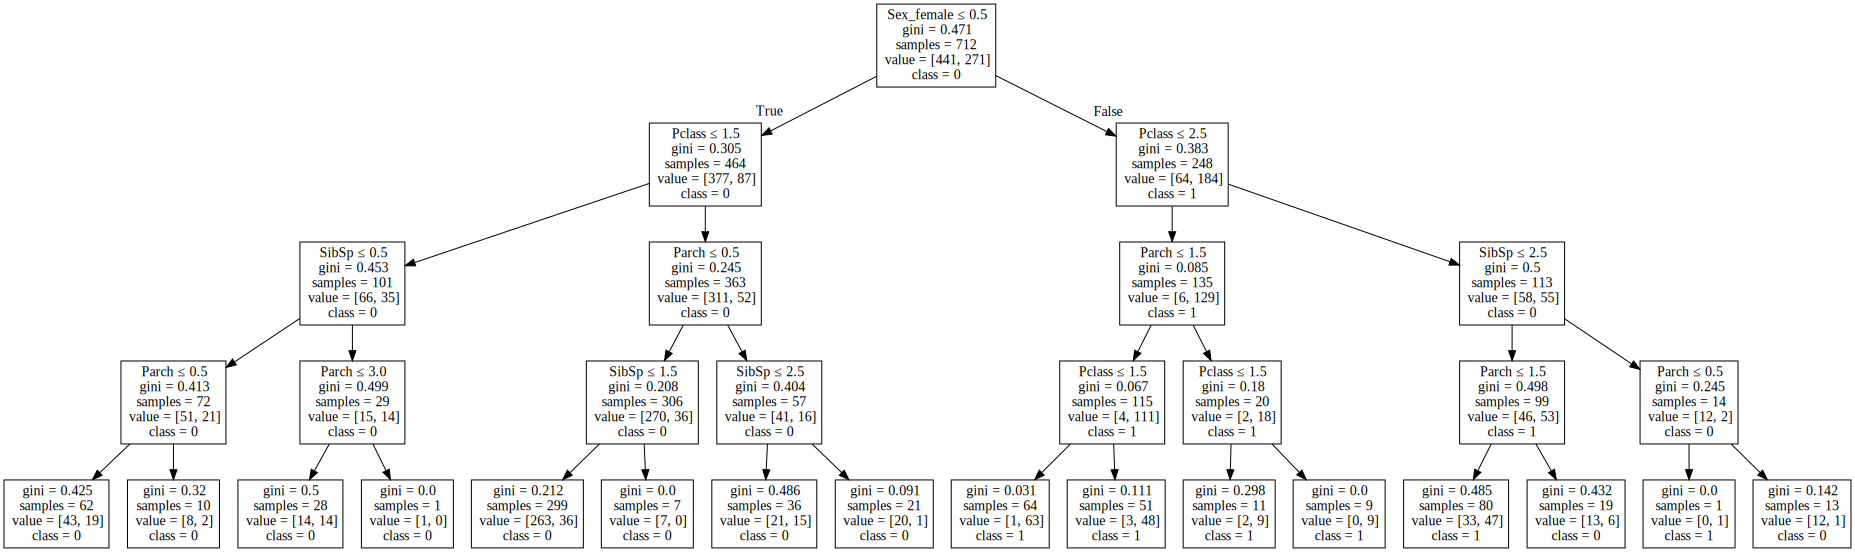

In [32]:
# plot tree
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, class_names=['0', '1'],special_characters=True) 
graphviz.Source(dot_data)


In [33]:
#  Prediction 
predictions = model.predict(Xtest)
score = f1_score(y_test, predictions)
print(score)

0.7076923076923076


# Apply to the testing file   : 

In [36]:
# for each passenger we predicte if survived or not.
# so we save the data in a DataFrame with two columns, first colummn contain PassngerId,the second Survived.

In [35]:
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission1.csv', index =False)
print(" prediction ========> saved")

 prediction ========> saved


In [26]:
output.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [37]:
# mortality rate according to the prediction,

survivedPredicted = output.loc[output.Survived==1]

rateSruvived = len(survivedPredicted)/len(output)

print(" Survival rate in our prediction : ", rateSruvived)

print(" non-survivals rate is           : ", 1-rateSruvived)

 Survival rate in our prediction :  0.3349282296650718
 non-survivals rate is           :  0.6650717703349283
